<a href="https://colab.research.google.com/github/Solotea10/police-violations/blob/main/police_violations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POLICE VIOLATIONS**

## **INTRODUCTION**
 We are going to analyse the various factors considered when traffic regulations are broken.
 First we will import the dataset then clean it properly so we can make reliable decisions
 basing on it. Finally we will visualise it and then make conclusions on our findings.


# **DATA INGESTION**

In [4]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime as dt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Police.csv to Police.csv


In [5]:
# Import the dataset
df=pd.read_csv('Police.csv')

# EXPLORATORY DATA ANALYSIS

In [ ]:
# Take a glance at the dataset head and tail
df.head(-1)

,Date,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005 1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005 8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005 23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005 17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005 10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91735,12/31/2015 20:25,NaN,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,12/31/2015 20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,12/31/2015 20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,12/31/2015 20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False


In [6]:
# Looking at the dataset columns
df.columns

Index(['Date', 'county_name', 'driver_gender', 'driver_age_raw', 'driver_age',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [7]:
df.shape

(91741, 14)

The dataset has 91741 rows and 14 columns

Let us look out for null values in the dataset to see if we can clean it.

In [8]:
df.isnull().sum()

Date                      0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

The dataset has very many null values infact columns 'county_name'and 'search_type' will be dropped since most of the values they contain are null that is more than 95% of there values.

In [9]:
df=df.drop(columns=['county_name','search_type'])

Drop all the other null valls in other columns.These are taking up about 5% of there respective columns

In [10]:
df=df.dropna()

Now let us see how our dataset looks like

In [11]:
df

,Date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005 1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005 8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005 23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005 17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005 10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91736,12/31/2015 20:27,M,1986.0,29.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
91737,12/31/2015 20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,Warning,False,0-15 Min,False
91738,12/31/2015 20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,Warning,False,0-15 Min,False
91739,12/31/2015 21:42,M,1993.0,22.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


Our dataset now has 86113 rows from 91741 rows before removing null values and also has 12 columns from the 14 before dropping the 2 columns

This data needs more cleaning. Let us drop duplicate values if they exist

In [12]:
df=df.drop_duplicates(keep=False)
df

,Date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005 1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005 8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005 23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005 17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005 10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91736,12/31/2015 20:27,M,1986.0,29.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
91737,12/31/2015 20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,Warning,False,0-15 Min,False
91738,12/31/2015 20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,Warning,False,0-15 Min,False
91739,12/31/2015 21:42,M,1993.0,22.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


After removing duplicate the number of rows has reduced from 86113 to 85590 rows

What is the length of the index

In [13]:
len(df.index)

85590

The index should be equal to the number of rows so lets reset the index

In [14]:
df=df.reset_index()
df

,index,Date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,0,1/2/2005 1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1,1/18/2005 8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2,1/23/2005 23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,3,2/20/2005 17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,4,3/14/2005 10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85585,91736,12/31/2015 20:27,M,1986.0,29.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
85586,91737,12/31/2015 20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,Warning,False,0-15 Min,False
85587,91738,12/31/2015 20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,Warning,False,0-15 Min,False
85588,91739,12/31/2015 21:42,M,1993.0,22.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [15]:
df.isnull().sum()

index                 0
Date                  0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

Let us drop the column named index

In [16]:
df=df.drop(columns='index')

In [17]:
df.dtypes

Date                   object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

Let us separate the day,month and year in the date column

In [18]:
df['Date']=pd.to_datetime(df['Date'])

In [19]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print(df)


                     Date driver_gender  driver_age_raw  driver_age  \
0     2005-01-02 01:55:00             M          1985.0        20.0   
1     2005-01-18 08:15:00             M          1965.0        40.0   
2     2005-01-23 23:15:00             M          1972.0        33.0   
3     2005-02-20 17:15:00             M          1986.0        19.0   
4     2005-03-14 10:00:00             F          1984.0        21.0   
...                   ...           ...             ...         ...   
85585 2015-12-31 20:27:00             M          1986.0        29.0   
85586 2015-12-31 20:35:00             F          1982.0        33.0   
85587 2015-12-31 20:45:00             M          1992.0        23.0   
85588 2015-12-31 21:42:00             M          1993.0        22.0   
85589 2015-12-31 22:46:00             M          1959.0        56.0   

      driver_race                   violation_raw         violation  \
0           White                        Speeding          Speeding   
1    

In [20]:
df['Year'].value_counts()

2012    10362
2006    10009
2007     8767
2014     8765
2015     8157
2008     8029
2011     7560
2013     7381
2009     7179
2010     6938
2005     2443
Name: Year, dtype: int64

In [21]:
df['drugs_related_stop'].value_counts()

False    84778
True       812
Name: drugs_related_stop, dtype: int64

In [22]:
df['violation_raw'].value_counts()

Speeding                            48087
Other Traffic Violation             16060
Equipment/Inspection Violation      10947
Registration Violation               3387
Seatbelt Violation                   2940
Special Detail/Directed Patrol       2359
Call for Service                     1265
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              187
APB                                    78
Suspicious Person                      54
Warrant                                15
Name: violation_raw, dtype: int64

In [23]:
df['violation'].value_counts()

Speeding               48087
Moving violation       16060
Equipment              10947
Other                   4169
Registration/plates     3387
Seat belt               2940
Name: violation, dtype: int64

In [24]:
df['search_conducted'].value_counts()

False    82417
True      3173
Name: search_conducted, dtype: int64

In [25]:
df.groupby('driver_gender')['driver_race'].value_counts()

driver_gender  driver_race
F              White          18383
               Black           2553
               Hispanic        1861
               Asian            511
               Other             24
M              White          43197
               Black           9556
               Hispanic        7558
               Asian           1734
               Other            213
Name: driver_race, dtype: int64

In [26]:
df=df.replace({'drugs_related_stop':{'False':0,'True':1},'is_arrested':{'False':0,'True':1}})

## **DATA VISUALIZATION**

Let us make some data visualisations using seaborn

First lets see the Race and Gender of the violating driver

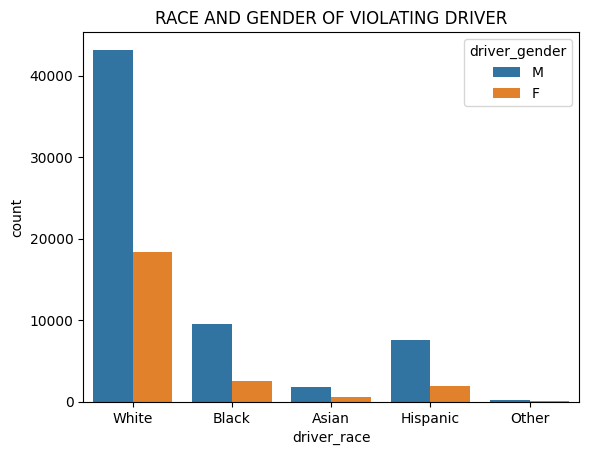

<Figure size 1000x6000 with 0 Axes>

In [27]:
sns.countplot(x='driver_race',hue='driver_gender',data=df)
plt.title('RACE AND GENDER OF VIOLATING DRIVER')
plt.figure(figsize=[10,60])
plt.show()

Lets now see the violations per year

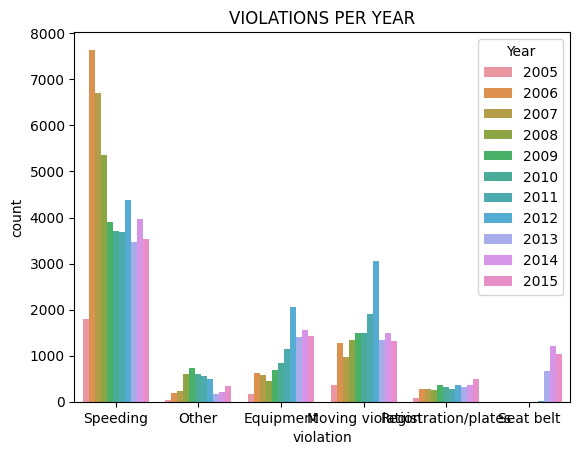

In [28]:
sns.countplot(x='violation',hue='Year',data=df)
plt.title ('VIOLATIONS PER YEAR')
plt.show()

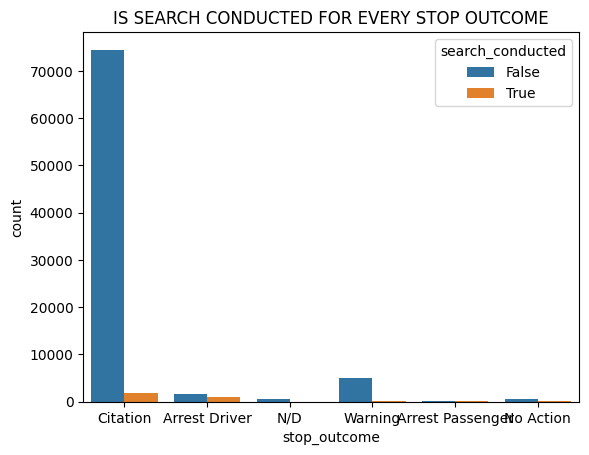

In [29]:
sns.countplot(x='stop_outcome',hue='search_conducted',data=df)
plt.title ('IS SEARCH CONDUCTED FOR EVERY STOP OUTCOME')
plt.show()

## **CONCLUSION**



From the above analysis we can conclude that these are the facts got from the dataset.

- In most cases search is not conducted for every stop outcome.

- The violations are mainly caused by over speeding and for the period 2005 to 2015 they where mostly in 2006.The year 2005 had   the least violations in the same period.

- White male committed the most traffic violations in the period 2005 to 2015 by far.The where follwed by white females.           Combined the white male and females committed more traffice violations than all the other races and genders combined.
- It is very rare to have drug related stops.
-In most cases there is no arrest warrant.

                                                      END